IMPORTATION DES BIBLIOTHEQUES

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pyampute.exploration.mcar_statistical_tests import MCARTest
from sklearn.impute import SimpleImputer
import missingno as msno


    AFFICHAGE DE LA BASE DE DONNES

In [127]:
df = pd.read_csv("flights.csv")
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


AFFICHAGE DES 5 DERNIERES VALEURS DE LA BASE DE DONNEES

In [128]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


In [129]:
df.shape

(336776, 21)

AFFICHAGE DES VALEURS MANQUANTES DANS LA BASE DE DONNEES

In [130]:
df.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Notre base de données contient des valeurs manquantes dans les colonnes dep_time, dep_relay, arr_time, arr_delay

In [131]:
df.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

--- DETERMINONS L'ASYMETRIE ET LA SYMETRIE DES VARIABLES AVEC LES VALEURS MANQUANTES

<Axes: >

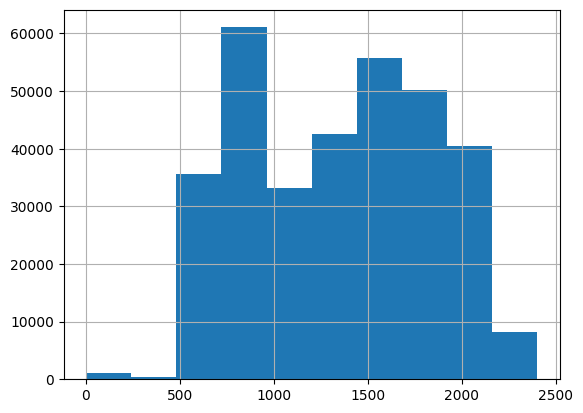

In [132]:
df['dep_time'].hist()


dep_time a une distribution asymétrique.

<Axes: >

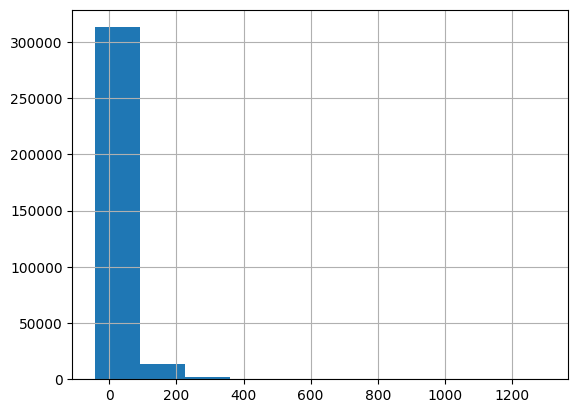

In [133]:
df["dep_delay"].hist()

dep_delay a une distribution asymétrique.

<Axes: >

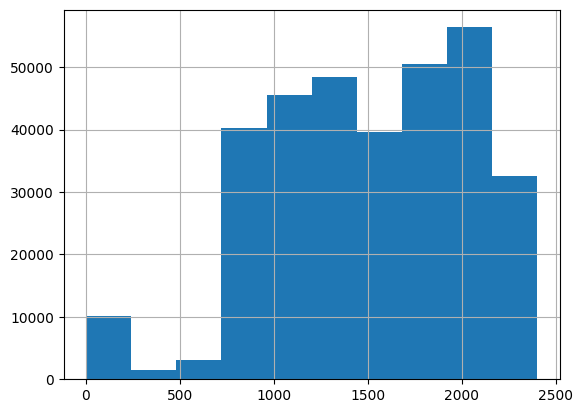

In [134]:
df['arr_time'].hist()

arr_time a une distribution asymétrique.

<Axes: >

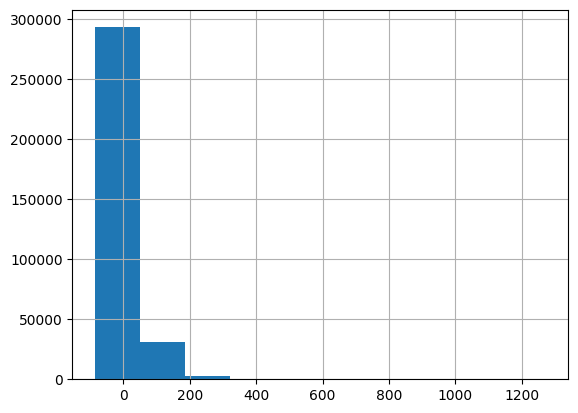

In [135]:
df['arr_delay'].hist()

arr_delay a une distribution asymétrique.

LA METHODE ADEQUAT POUR REMPLACER LES VALEURS MANQUANTES EST PAR LA MEDIANE, PARCE QUE LES DISTRIBUTIONS NE SONT PAS SYMETRIQUE.

In [136]:
def imputeNaNMedian(data): 
    for col in data.select_dtypes(include="number").columns:
        if -1 <= data[col].skew() <= 1:
            data[col] = data[col].fillna(data[col].mean())

In [137]:
imputeNaNMedian(data=df)
df["dep_delay"].fillna(df["dep_delay"].median(), inplace=True)
df["arr_delay"].fillna(df["arr_delay"].median(), inplace=True)
df.isna().sum()

C:\Users\Guindogba Nek\AppData\Local\Temp\ipykernel_11372\330045783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dep_delay"].fillna(df["dep_delay"].median(), inplace=True)
C:\Users\Guindogba Nek\AppData\Local\Temp\ipykernel_11372\330045783.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Transformation des colonnes en format date (dep_time, month,  sched_dep_time, arr_time, sched_arr_time)

In [138]:
def convert_to_time(hhmm):
    try:
        hhmm = int(hhmm)
        hours = hhmm // 100
        minutes = hhmm % 100
        return pd.to_datetime(f'{hours:02d}:{minutes:02d}', format='%H:%M').time()
    except:
        return pd.NaT 

In [139]:
df['dep_time'] = df['dep_time'].apply(convert_to_time)
df['sched_dep_time'] = df['sched_dep_time'].apply(convert_to_time)
df['arr_time'] = df['arr_time'].apply(convert_to_time)
df['sched_arr_time'] = df['sched_arr_time'].apply(convert_to_time)

In [140]:

df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name(locale='fr_FR')

In [141]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,Janvier,1,05:17:00,05:15:00,2.0,08:30:00,08:19:00,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,Janvier,1,05:33:00,05:29:00,4.0,08:50:00,08:30:00,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,Janvier,1,05:42:00,05:40:00,2.0,09:23:00,08:50:00,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,Janvier,1,05:44:00,05:45:00,-1.0,10:04:00,10:22:00,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,Janvier,1,05:54:00,06:00:00,-6.0,08:12:00,08:37:00,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


Maintenant nous avons une transformation en datatime.

2--- VERIFIONS LES VALEURS ABERANTES.

<Axes: >

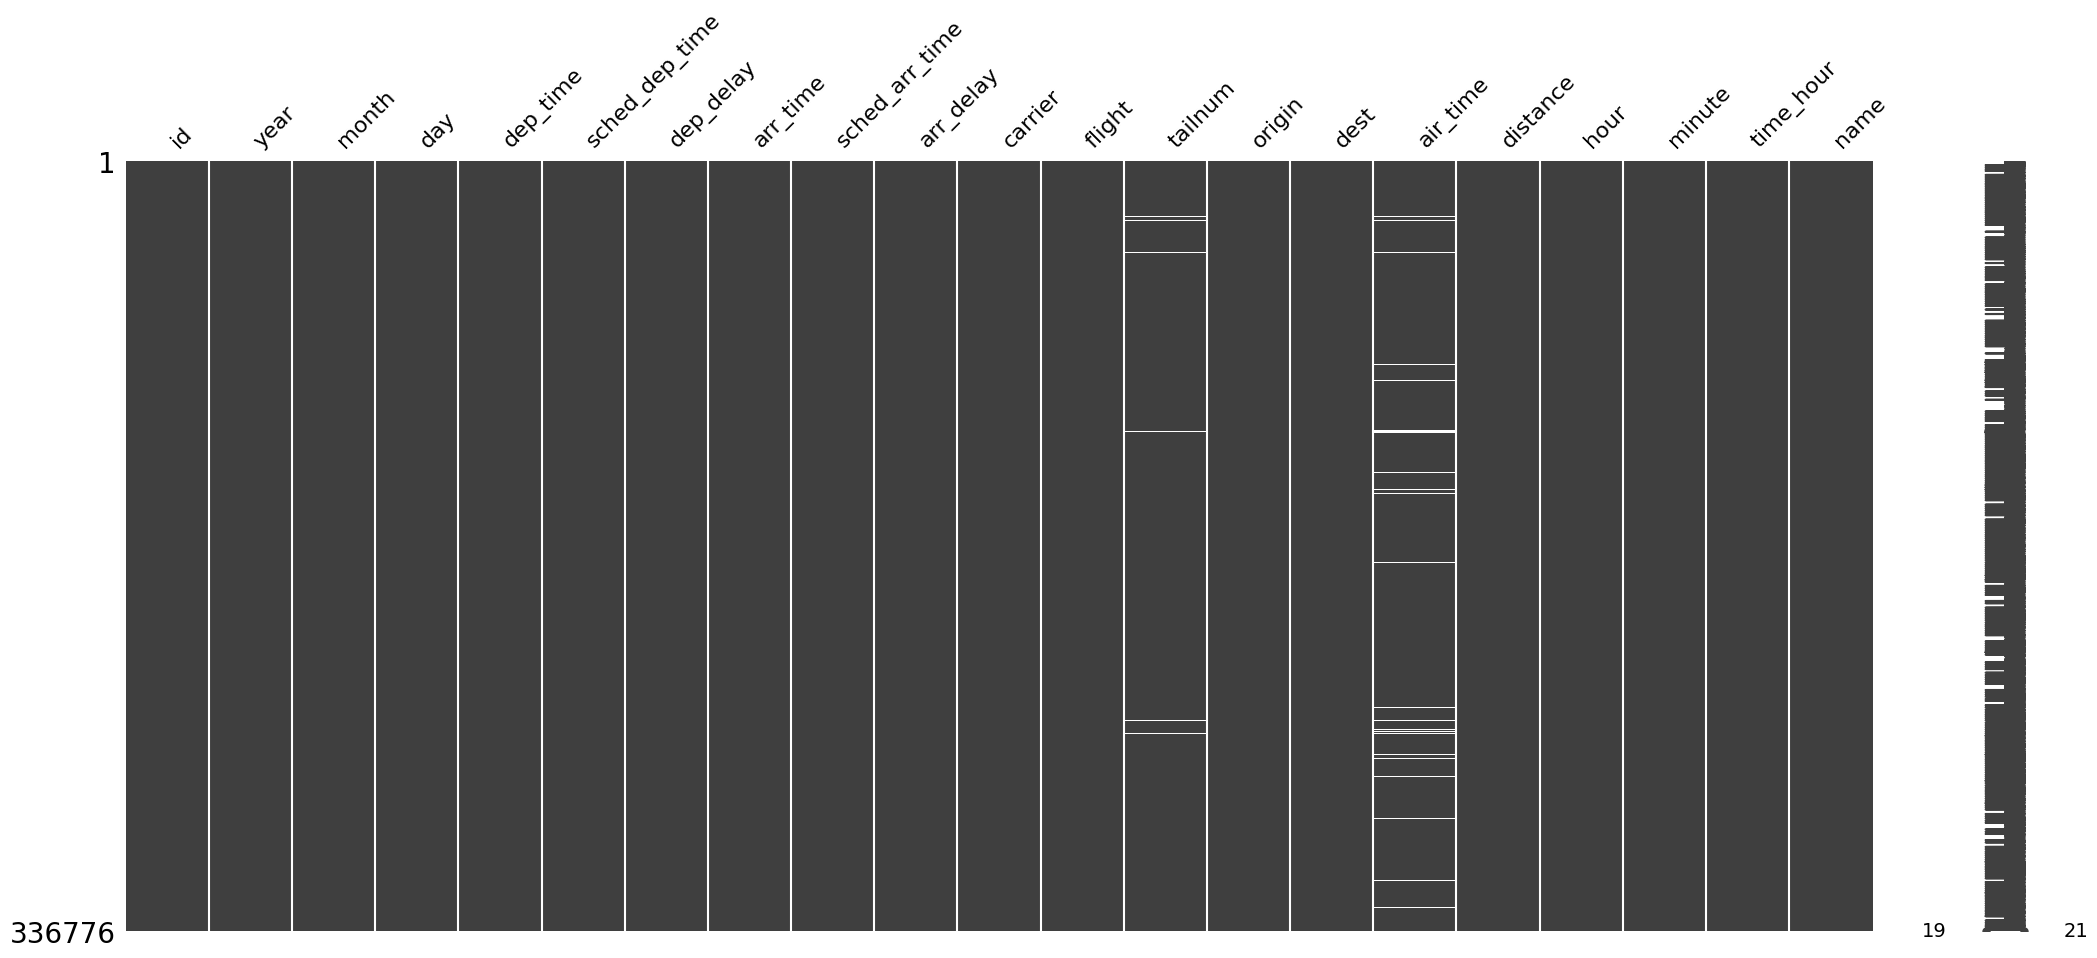

In [142]:
msno.matrix(df)

<Axes: >

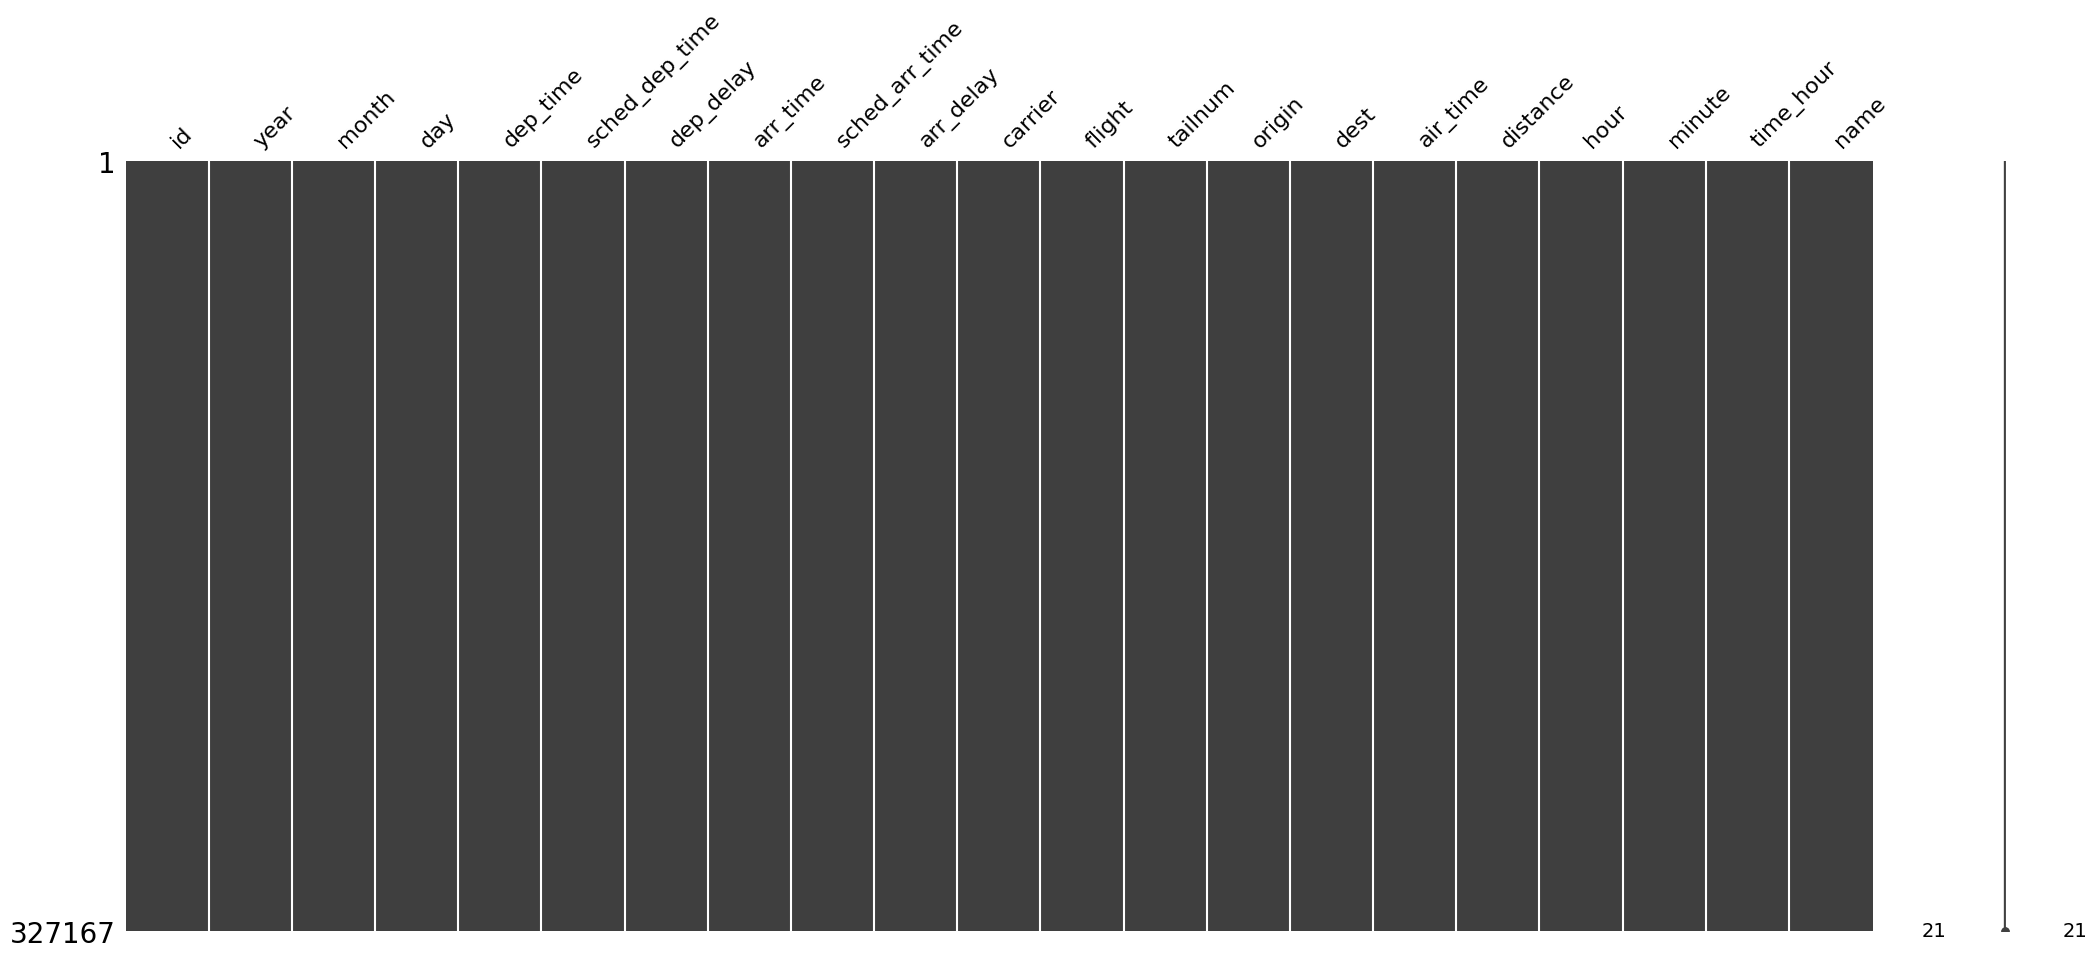

In [143]:
df = df.dropna()
msno.matrix(df)

In [144]:
def graphics(data, nrows=1, ncols=2):
    for col in data.select_dtypes('number').columns:
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4))
        sns.boxplot(x=data[col], ax=axes[0])
        sns.histplot(data[col], ax=axes[1])
    plt.show()  

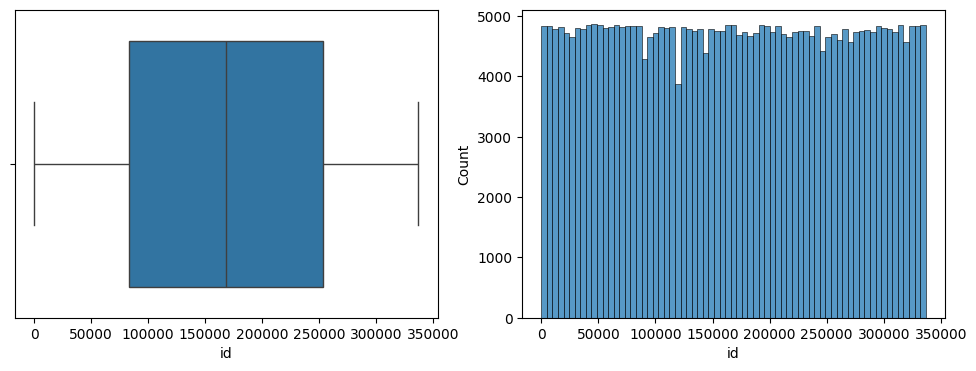

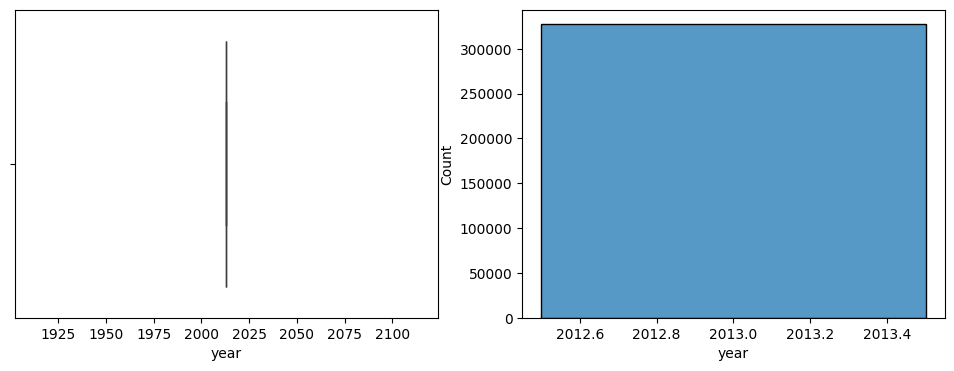

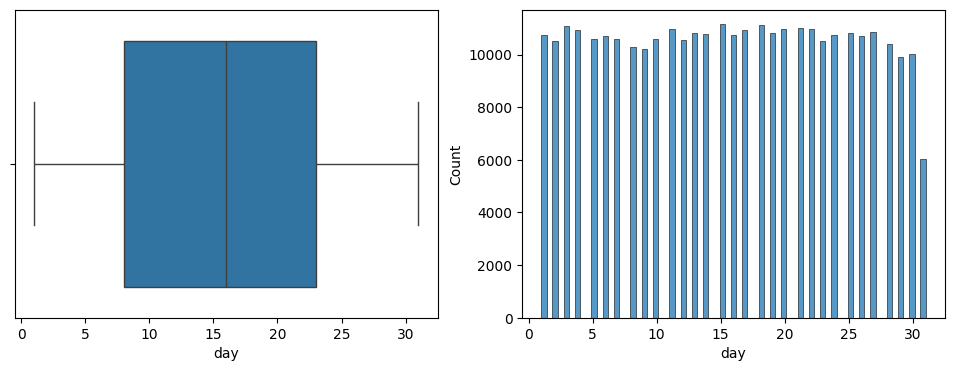

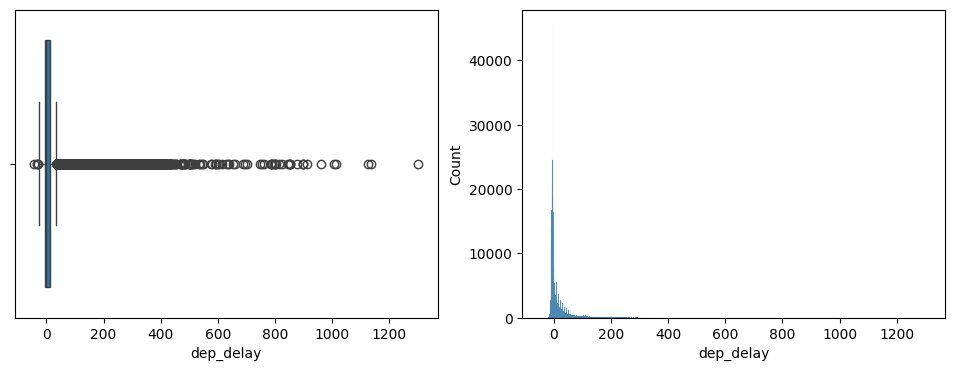

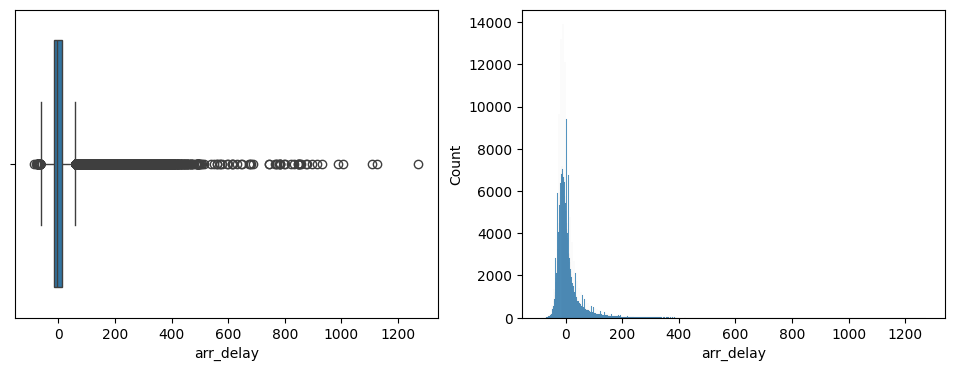

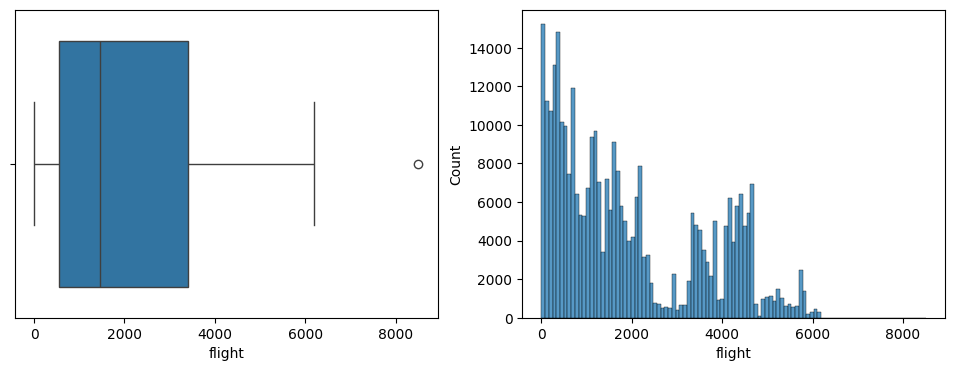

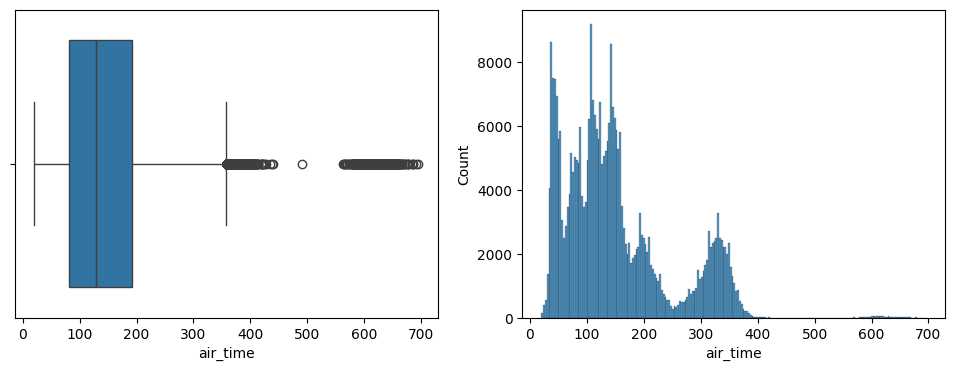

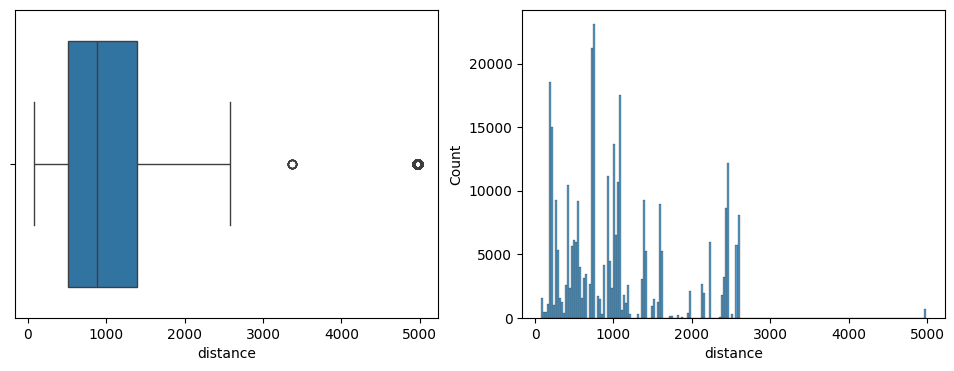

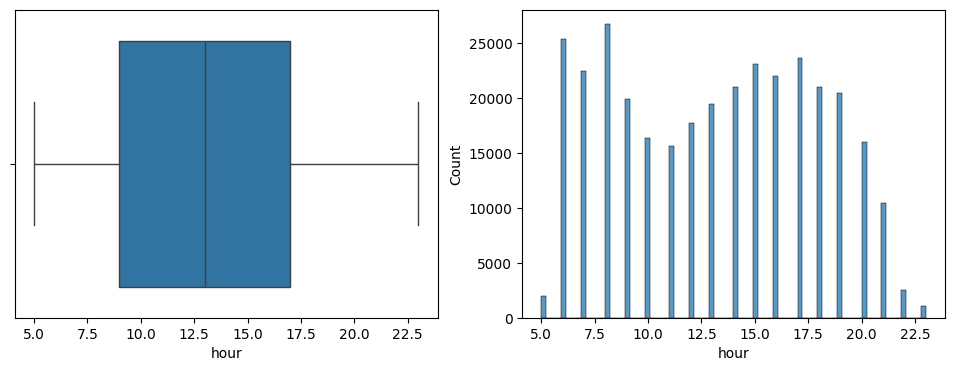

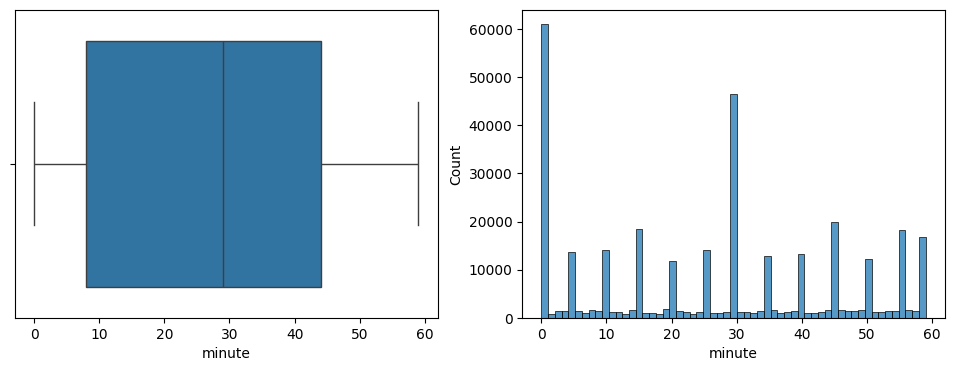

In [145]:
graphics(data=df)

Nous voyons ici l'apparition des valeurs abérantes dans notre bas de données. Les variables dep_delay, arr_delay, flight, arr_time, distance, 



LA METHODE ADEQUAT EST OUTLIER ZSCORE :

In [146]:
 for col in df.select_dtypes('number').columns:
        if not (-0.5 <= df[col].skew() <= 0.5):
            print(col)

dep_delay
arr_delay
flight
air_time
distance


In [147]:
def imputeOutlierZscore(data, threshold=2):
    for col in data.select_dtypes(include="number").columns:
        if -0.5 <= data[col].skew() <= 0.5:
            mean = np.mean(data[col])
            std = np.std(data[col])
            z = (data[col] - mean)/std
            data[col] = np.where(np.abs(z) > threshold, mean, data[col])
    return data

In [148]:
df = imputeOutlierZscore(data=df)

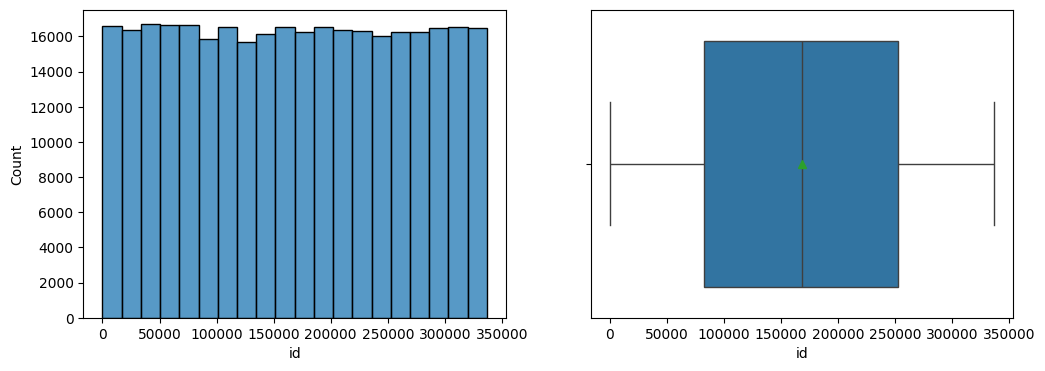

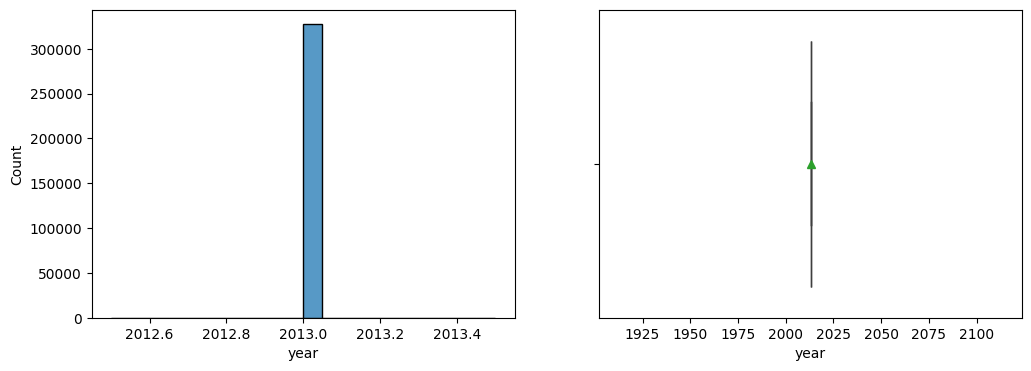

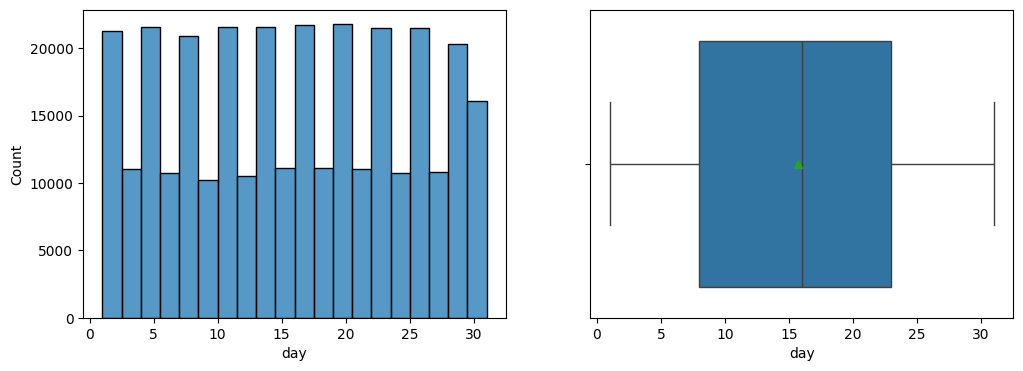

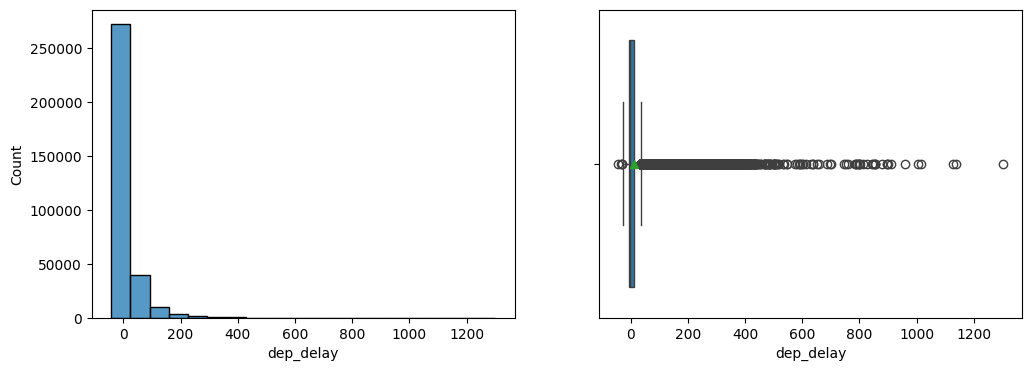

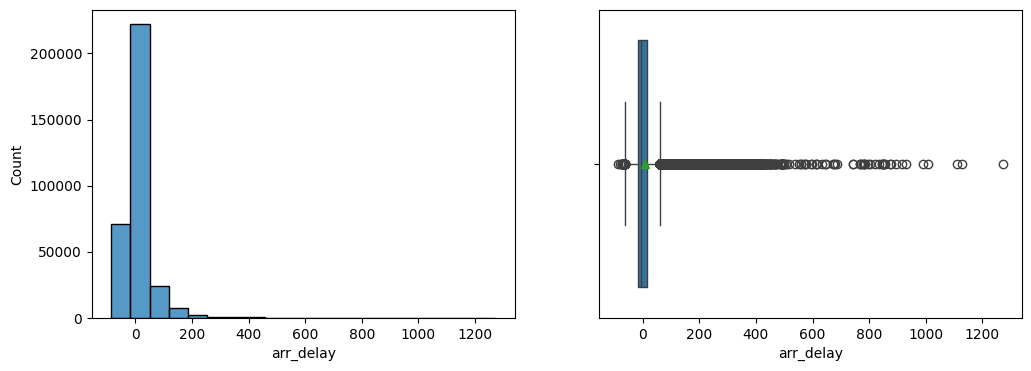

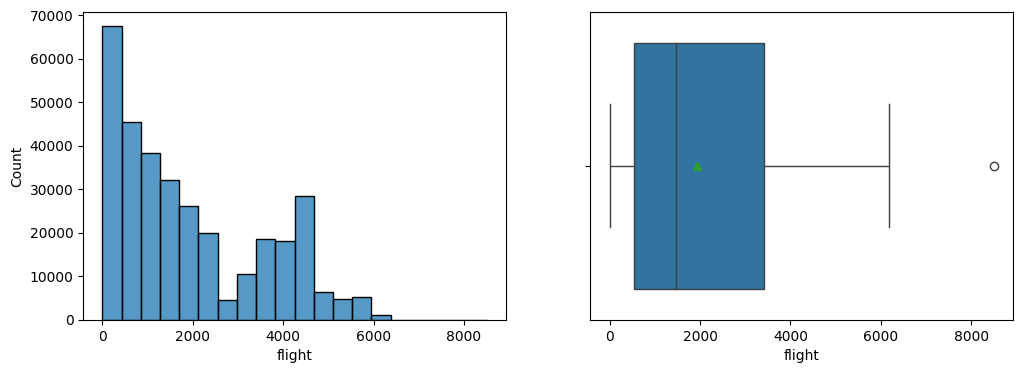

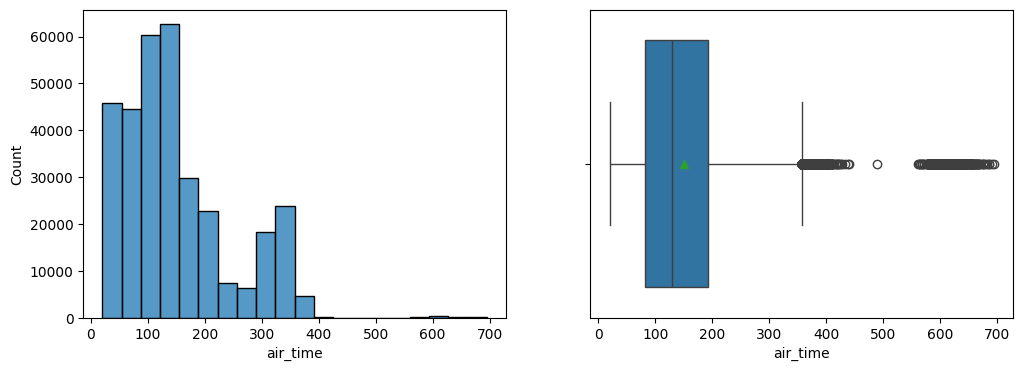

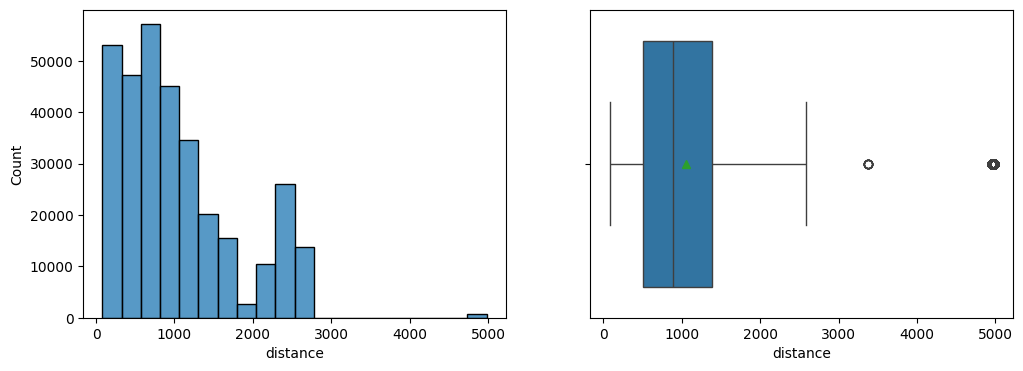

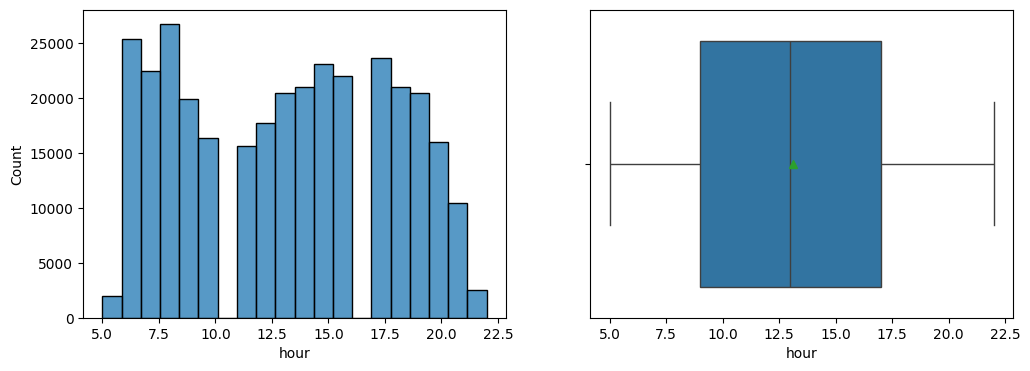

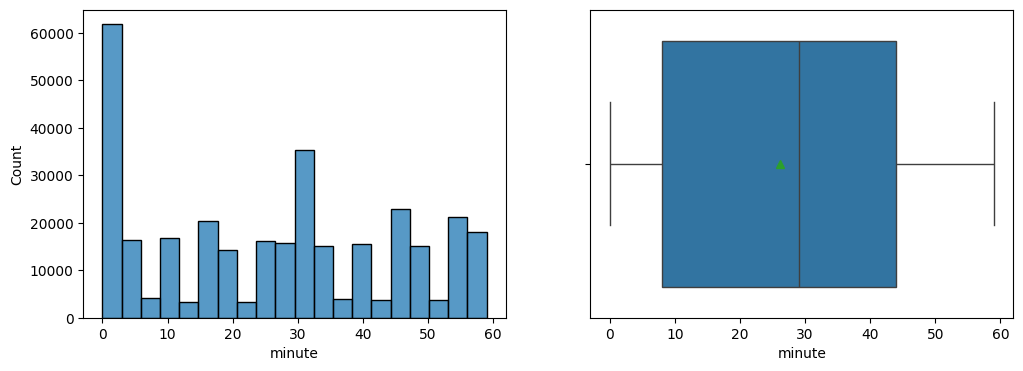

In [149]:
distributions(df)

3----  La répartition des vols par compagnie aérienne. Quelle compagnie a le plus grand/ petit
 nombre de vols :

In [150]:
vols_par_compagnie = df['name'].value_counts().reset_index()
vols_par_compagnie.columns = ['Compagnie aérienne', 'Nombre de vols']

In [151]:
print(" Répartition des vols par compagnie aérienne :")
print(vols_par_compagnie)

 Répartition des vols par compagnie aérienne :
             Compagnie aérienne  Nombre de vols
0         United Air Lines Inc.           57782
1               JetBlue Airways           53943
2      ExpressJet Airlines Inc.           51081
3          Delta Air Lines Inc.           47636
4        American Airlines Inc.           31938
5                     Envoy Air           25030
6               US Airways Inc.           19830
7             Endeavor Air Inc.           17290
8        Southwest Airlines Co.           12041
9                Virgin America            5116
10  AirTran Airways Corporation            3175
11         Alaska Airlines Inc.             709
12       Frontier Airlines Inc.             681
13           Mesa Airlines Inc.             544
14       Hawaiian Airlines Inc.             342
15        SkyWest Airlines Inc.              29


Compagnie avec le plus et le moins de vols

In [152]:
compagnie_max = vols_par_compagnie.iloc[0]
compagnie_min = vols_par_compagnie.iloc[-1]

table_extremes = pd.DataFrame({
    'Statut': ['Plus grand nombre de vols', 'Plus petit nombre de vols'],
    'Compagnie aérienne': [compagnie_max['Compagnie aérienne'], compagnie_min['Compagnie aérienne']],
    'Nombre de vols': [compagnie_max['Nombre de vols'], compagnie_min['Nombre de vols']]
})

print(" Compagnies avec le plus / moins de vols :")
print(table_extremes)

 Compagnies avec le plus / moins de vols :
                      Statut     Compagnie aérienne  Nombre de vols
0  Plus grand nombre de vols  United Air Lines Inc.           57782
1  Plus petit nombre de vols  SkyWest Airlines Inc.              29


Nous voyons ici que la compagnie avec le grand nombre de vols est United Air Lines Inc et le plus petit nombre de vols est SkyWest Airlines Inc.

4-----  Donner la répartition du nombre de vols retardés au depart par mois

In [153]:
df['time_hour'] = pd.to_datetime(df['time_hour'])

Répartition du nombre de vols retardés au départ par mois :
month
Janvier       9610
Février       9077
Mars         11157
Avril        10475
Mai          11219
Juin         12541
Juillet      13757
Août         11658
Septembre     7747
Octobre       8698
Novembre      8211
Décembre     13475
Name: count, dtype: int64


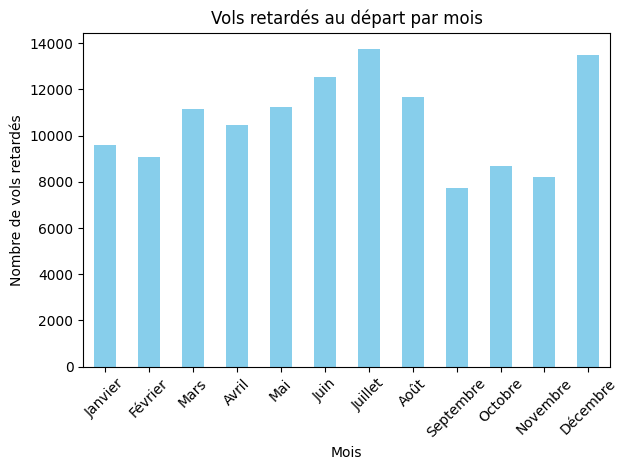

In [154]:
retards_dep = df[df['dep_delay'] > 0]

retards_par_mois = retards_dep['month'].value_counts().sort_index()

month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
               'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
retards_par_mois = retards_par_mois.reindex(month_order, fill_value=0)

print("Répartition du nombre de vols retardés au départ par mois :")
print(retards_par_mois)


retards_par_mois.plot(kind='bar', color='skyblue')
plt.title('Vols retardés au départ par mois')
plt.ylabel('Nombre de vols retardés')
plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Au mois de Juillet nous avons eu plus de retard au départ et en décembre. En juillet ceci explique la période des vacances et en Décembre la periode des fêtes.

5------ . Donner la répartition du nombre de vols retardés à l'arrivée par mois

Répartition du nombre de vols retardés à l'arrivée par mois :
month
Janvier      11141
Février      10090
Mars         10907
Avril        12515
Mai          10184
Juin         12473
Juillet      13290
Août         11624
Septembre     6837
Octobre       9815
Novembre      9630
Décembre     14380
Name: count, dtype: int64


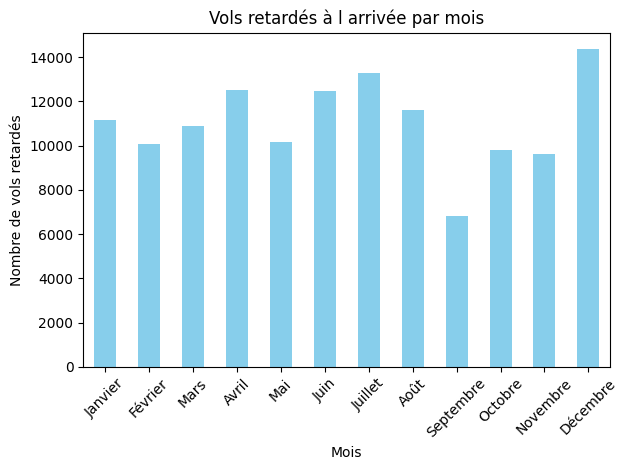

In [155]:
retards_arr = df[df['arr_delay'] > 0]


retards_par_mois = retards_arr['month'].value_counts()

#  l'ordre calendaire
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
               'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
retards_par_mois = retards_par_mois.reindex(month_order, fill_value=0)


print("Répartition du nombre de vols retardés à l'arrivée par mois :")
print(retards_par_mois)


retards_par_mois.plot(kind='bar', color='skyblue')
plt.title('Vols retardés à l arrivée par mois')
plt.ylabel('Nombre de vols retardés')
plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6--- Les retards au cours de la journée ?

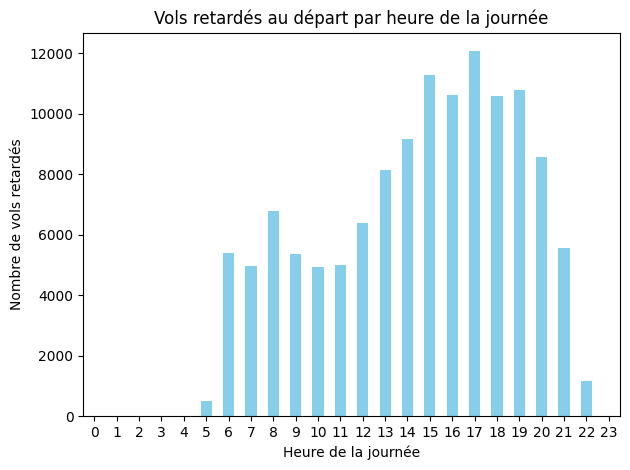

In [156]:
retards_dep = df[df['dep_delay'] > 0]

retards_par_heure = retards_dep['hour'].value_counts().sort_index()

# Réindexer pour inclure toutes les heures (0 à 23), même celles sans retards
retards_par_heure = retards_par_heure.reindex(range(24), fill_value=0)

retards_par_heure.plot(kind='bar', color='skyblue')
plt.title('Vols retardés au départ par heure de la journée')
plt.ylabel('Nombre de vols retardés')
plt.xlabel('Heure de la journée')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Nous voyons que nous avons plus de retads dans la journées à 17h. Les intervalles des heures y'a plus de retard 14h-20h. Dans ces heures que le nombre de retard au départ augmente.

7--- La compagnie ayant accusé le plus de retard ?

In [157]:
retards_arr = df[df['arr_delay'] > 0]

retards_par_compagnie = retards_arr['name'].value_counts()

print("Répartition du nombre de vols retardés à l'arrivée par compagnie :")
print(retards_par_compagnie)

# Compagnie avec le plus de retards
compagnie_max_retards = retards_par_compagnie.idxmax()
nb_retards = retards_par_compagnie.max()
print(f"\nLa compagnie avec le plus de retards à l'arrivée est : {compagnie_max_retards} avec {nb_retards} vols retardés.")

Répartition du nombre de vols retardés à l'arrivée par compagnie :
name
ExpressJet Airlines Inc.       24457
JetBlue Airways                23555
United Air Lines Inc.          22222
Delta Air Lines Inc.           16399
Envoy Air                      11686
American Airlines Inc.         10698
US Airways Inc.                 7348
Endeavor Air Inc.               6633
Southwest Airlines Co.          5301
AirTran Airways Corporation     1895
Virgin America                  1746
Frontier Airlines Inc.           392
Mesa Airlines Inc.               258
Alaska Airlines Inc.             189
Hawaiian Airlines Inc.            97
SkyWest Airlines Inc.             10
Name: count, dtype: int64

La compagnie avec le plus de retards à l'arrivée est : ExpressJet Airlines Inc. avec 24457 vols retardés.


Vérifions si les compagnies ayant le plus grand nombre élevé de vols ont plus de retard au départ ?

In [158]:
total_vols = df['name'].value_counts().rename('total_vols')

retards_dep = df[df['dep_delay'] > 0]

retards_par_compagnie = retards_dep['name'].value_counts().rename('vols_retardes')

repartition = pd.DataFrame({'total_vols': total_vols, 'vols_retardes': retards_par_compagnie}).fillna(0)

# Convertir vols_retardes en entier
repartition['vols_retardes'] = repartition['vols_retardes'].astype(int)

repartition = repartition.sort_values(by='total_vols', ascending=False)

print("Répartition des vols et des vols retardés au départ par compagnie :")
print(repartition)

Répartition des vols et des vols retardés au départ par compagnie :
                             total_vols  vols_retardes
name                                                  
United Air Lines Inc.             57782          27125
JetBlue Airways                   53943          21319
ExpressJet Airlines Inc.          51081          22949
Delta Air Lines Inc.              47636          15169
American Airlines Inc.            31938          10097
Envoy Air                         25030           7959
US Airways Inc.                   19830           4761
Endeavor Air Inc.                 17290           6976
Southwest Airlines Co.            12041           6532
Virgin America                     5116           2216
AirTran Airways Corporation        3175           1647
Alaska Airlines Inc.                709            225
Frontier Airlines Inc.              681            340
Mesa Airlines Inc.                  544            232
Hawaiian Airlines Inc.              342             

Nous voyons que United Air Lines Inc avec le grand nombre élevé de retard et à connu le plus grand nombre de retard au départ aussi.

Vérifions si les compagnies ayant le plus grand nombre élevé de vols ont plus de retard à l'arrivé ?

In [159]:
total_vols = df['name'].value_counts().rename('total_vols')

retards_arr = df[df['arr_delay'] > 0]

# Compter le nombre de vols retardés à l'arrivée par compagnie
retards_par_compagnie = retards_arr['name'].value_counts().rename('vols_retardes_arrivee')

repartition = pd.DataFrame({'total_vols': total_vols, 'vols_retardes_arrivee': retards_par_compagnie}).fillna(0)

repartition['vols_retardes_arrivee'] = repartition['vols_retardes_arrivee'].astype(int)

repartition = repartition.sort_values(by='total_vols', ascending=False)

print("Répartition des vols et des vols retardés à l'arrivée par compagnie :")
print(repartition)

Répartition des vols et des vols retardés à l'arrivée par compagnie :
                             total_vols  vols_retardes_arrivee
name                                                          
United Air Lines Inc.             57782                  22222
JetBlue Airways                   53943                  23555
ExpressJet Airlines Inc.          51081                  24457
Delta Air Lines Inc.              47636                  16399
American Airlines Inc.            31938                  10698
Envoy Air                         25030                  11686
US Airways Inc.                   19830                   7348
Endeavor Air Inc.                 17290                   6633
Southwest Airlines Co.            12041                   5301
Virgin America                     5116                   1746
AirTran Airways Corporation        3175                   1895
Alaska Airlines Inc.                709                    189
Frontier Airlines Inc.              681         

Nous voyons que les compagnies avec le plus grand nombre de vols ont une possibilité très élevé d'être en retard tant au départ qu'à l'arrivé.

8-----Visualisez la répartition des retards moyens en fonction des différents modèles d'avions (tailnum).
 Quels modèles semblent être les plus sujets aux retards ?

In [160]:
retards = df[df['dep_delay'].notna() & df['arr_delay'].notna()]


retards_moyens = retards.groupby('tailnum')[['dep_delay', 'arr_delay']].mean().rename(columns={
    'dep_delay': 'retard_moyen_dep',
    'arr_delay': 'retard_moyen_arr'
})

# Trier par retard moyen au départ (ordre décroissant) et prendre les 20 premiers
retards_moyens = retards_moyens.sort_values(by='retard_moyen_dep', ascending=False).head(20)

print("Retards moyens au départ et à l'arrivée par modèle d'avion (top 20) :")
print(retards_moyens)

Retards moyens au départ et à l'arrivée par modèle d'avion (top 20) :
         retard_moyen_dep  retard_moyen_arr
tailnum                                    
N844MH              297.0        320.000000
N922EV              274.0        276.000000
N587NW              272.0        264.000000
N911DA              268.0        294.000000
N851NW              233.0        219.000000
N654UA              227.0        185.000000
N928DN              203.0        201.000000
N7715E              186.0        188.000000
N665MQ              177.0        174.666667
N136DL              165.0        146.000000
N633AW              164.0        136.000000
N790SK              154.0        140.000000
N670US              132.0        120.000000
N427SW              131.0        157.000000
N305AS              112.5         90.500000
N78003              111.0        137.000000
N7ASAA              104.0         62.000000
N828AW               97.0        106.500000
N657UA               91.0         71.000000
N937DN

9-----  . Mettre les variables à une échelle commune si nécessaire, sans modifier les distributions de
 données.

In [161]:
retards = df[df['dep_delay'].notna() & df['arr_delay'].notna()]

retards_moyens = retards.groupby('tailnum')[['dep_delay', 'arr_delay']].mean().rename(columns={
    'dep_delay': 'retard_moyen_dep',
    'arr_delay': 'retard_moyen_arr'
})

# Normalisation Min-Max pour mettre les retards sur une échelle commune (0 à 1)
retards_moyens['retard_moyen_dep_norm'] = (retards_moyens['retard_moyen_dep'] - retards_moyens['retard_moyen_dep'].min()) / (retards_moyens['retard_moyen_dep'].max() - retards_moyens['retard_moyen_dep'].min())
retards_moyens['retard_moyen_arr_norm'] = (retards_moyens['retard_moyen_arr'] - retards_moyens['retard_moyen_arr'].min()) / (retards_moyens['retard_moyen_arr'].max() - retards_moyens['retard_moyen_arr'].min())

# Trier par retard moyen au départ normalisé (ordre décroissant) et prendre les 20 premiers
retards_moyens = retards_moyens.sort_values(by='retard_moyen_dep_norm', ascending=False).head(20)

print("Retards moyens au départ et à l'arrivée par modèle d'avion (top 20, normalisés) :")
print(retards_moyens[['retard_moyen_dep', 'retard_moyen_arr', 'retard_moyen_dep_norm', 'retard_moyen_arr_norm']])

Retards moyens au départ et à l'arrivée par modèle d'avion (top 20, normalisés) :
         retard_moyen_dep  retard_moyen_arr  retard_moyen_dep_norm  \
tailnum                                                              
N844MH              297.0        320.000000               1.000000   
N922EV              274.0        276.000000               0.926045   
N587NW              272.0        264.000000               0.919614   
N911DA              268.0        294.000000               0.906752   
N851NW              233.0        219.000000               0.794212   
N654UA              227.0        185.000000               0.774920   
N928DN              203.0        201.000000               0.697749   
N7715E              186.0        188.000000               0.643087   
N665MQ              177.0        174.666667               0.614148   
N136DL              165.0        146.000000               0.575563   
N633AW              164.0        136.000000               0.572347   
N790SK  

 9--- Encoder la variable origin en sélectionnant une méthode adéquate

In [163]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin')